# Project 3 - Wrangling and visualizing Twitter(WeRateDogs) data

## Table of Contents
<ul>
<li><a href="#Overview">Overview</a></li>
<li><a href="#Gathering data">Gathering data</a></li>
<li><a href="#Assessing data">Assessing data</a></li>
<li><a href="#Data wrangling">Data wrangling</a></li>
<li><a href="#Saving data">Saving data</a></li>
<li><a href="#Data analysis and visualization">Data analysis and visualization</a></li>
</ul>

<a id='Overview'></a>

---
## Overview

This project aims to collect, rate, clean, analyze, and visualize tweets from the @dog_rates account on Twitter. However, the main process is data wrangling. There are three datasets. The first dataset is the basic information of the tweets collected using the Twitter API. The second data set is the image prediction results for tweets from the @dog_rates account on Twitter. The third data set is additional data about Tweets from the @dog_rates account on Twitter. These data sets are not yet cleaned, so they are dirty and messy. Clean, combine, analyze, and visualize these three data sets as needed.



<a id='Gathering data'></a>

---
## Gathering data

In [1]:
import tweepy
import pandas as pd
import numpy as np
import requests  
import matplotlib.pyplot as plt
import json
from timeit import default_timer as timer
pd.set_option('display.max_rows', 7)
%matplotlib inline

consummer_key = 'HIDDEN'
consummer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consummer_key, consummer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [2]:
df_twit_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
df_twit_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_image_predictions = pd.read_csv(image_predictions_url, sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
'''tweet_ids = df_twit_archive.tweet_id.values

fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        try:
            api_status = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(api_status._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)'''

'tweet_ids = df_twit_archive.tweet_id.values\n\nfails_dict = {}\nstart = timer()\n\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        try:\n            api_status = api.get_status(tweet_id, tweet_mode=\'extended\')\n            json.dump(api_status._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\n        \nend = timer()\nprint(end - start)\nprint(fails_dict)'

In [5]:
df_tweet_json = pd.read_json('tweet-json.txt', lines=True)
df_tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<a id='Assessing data'></a>

---
## Assessing data

Before cleaning up, I made a duplicate to preserve the original. I was able to identify some issues by opening the CSV file manually, looking around, and evaluating it programmatically.

In [6]:
# Copy and verify each dataset.
df_twit_archive_copy = df_twit_archive.copy()
df_image_predictions_copy = df_image_predictions.copy()
df_tweet_json_copy = df_tweet_json.copy()

In [7]:
df_twit_archive_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [8]:
df_image_predictions_copy.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [9]:
df_tweet_json_copy.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [10]:
# Check the information in each dataset.
df_twit_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df_image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [13]:
df_twit_archive_copy.name.value_counts()

None          745
a              55
Charlie        12
             ... 
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [14]:
# Check the value entered as 'a' (only print line 5)
df_twit_archive_copy[df_twit_archive_copy.name == 'a'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None


In [15]:
# Check for lowercase values entered in name, such as 'a', 'an', 'the', 'such', etc.
df_twit_archive_copy[df_twit_archive_copy.name.str.islower()].name.value_counts()

a             55
the            8
an             7
              ..
my             1
incredibly     1
space          1
Name: name, Length: 25, dtype: int64

In [16]:
# Check the unique value of rating_numerator.
df_twit_archive_copy.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [17]:
# Check the unique value of rating_denominator.
df_twit_archive_copy.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

### **Quality issues**
### df_twitter_archive dataset
- There are 59 missing values in the 'expanded_urls' column.
- There are useless rows due to retweets. (Non-empty rows in 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')
- Delete retweet-related columns (columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')
- Replace the data type of the 'timestamp' column with datetime.
- Invalid names exist in the 'name' column, such as 'a', 'an', 'the', 'such'. They appear to start with a lowercase letter.
- 'rating_numerator' has a value with a decimal point.
- Create a new column to calculate 'rating' and delete the 'rating_numerator' and 'rating_denominator' columns.
- Change the data type of the 'retweet_count', 'favorite_count' columns to int.

### **Tidiness-related**
### df_twitter_archive dataset
- Combine the columns 'doggo', 'floofer', 'pupper', and 'puppo' into one column.

### df_image_predictions dataset
- Combine 'p1', 'p1_conf', and 'p1_dog' into the df_twitter_archive dataset.

### df_tweet_data dataset
- Combine 'retweet_count', 'favorite_count' into the df_twitter_archive dataset.

<a id='Data wrangling'></a>

---
## Data wrangling
### **Quality issues**
### df_twitter_archive dataset
- There are 59 missing values in the 'expanded_urls' column.

In [18]:
# Remove rows with no value for 'expanded_urls'.
df_twit_archive_copy = df_twit_archive_copy[df_twit_archive_copy.expanded_urls.notnull()]
df_twit_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        2297 non-null   object 
 13  doggo                       2297 

- There are useless rows due to retweets. (Non-empty rows in 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')

In [19]:
# Remove rows with values of 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'.
df_twit_archive_copy = df_twit_archive_copy[df_twit_archive_copy.retweeted_status_id.isnull()]
df_twit_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

- Delete retweet-related columns (columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')

In [20]:
# Remove the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'.
df_twit_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [21]:
df_twit_archive_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


- Replace the data type of the 'timestamp' column with datetime.

In [22]:
# Change the type of 'timestamp' to datetime.
df_twit_archive_copy['timestamp'] = pd.to_datetime(df_twit_archive_copy['timestamp'])
df_twit_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               2117 non-null   object             
 9   floofer             2117 non-null   object             
 10  pupper              2117 non-null   object             
 11  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

- Invalid names exist in the 'name' column, such as 'a', 'an', 'the', 'such'. They appear to start with a lowercase letter.

In [23]:
# In the 'name' column, change the value that starts with a lowercase letter to None.
df_twit_archive_copy.loc[df_twit_archive_copy.name.str.islower(), 'name'] = 'None'

# Make sure there are no more values in the 'name' column that start with lowercase letters like 'a', 'an', 'the', 'such'.
df_twit_archive_copy.name.value_counts()

None          726
Lucy           11
Charlie        11
             ... 
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

- 'rating_numerator' has a value with a decimal point.

In [24]:
# Use str.extract() on column 'rating_numerator' to extract the value entered in decimal form. Change it to float form.
df_twit_archive_copy['rating_numerator'] = df_twit_archive_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[0]
df_twit_archive_copy['rating_numerator'] = df_twit_archive_copy['rating_numerator'].astype(float)

# Check its value.
df_twit_archive_copy[df_twit_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\333cu\AppData\Local\Temp\ipykernel_27316\2150153535.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_twit_archive_copy[df_twit_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None


- Create a new column to calculate 'rating' and delete the 'rating_numerator' and 'rating_denominator' columns.

In [25]:
# Create a column 'rating' to store the value obtained from the value of 'rating_numerator', divided by the value of 'rating_denominator'.
df_twit_archive_copy['rating'] = df_twit_archive_copy.rating_numerator / df_twit_archive_copy.rating_denominator
# Check for rows where 'rating_numerator' is entered in decimal form.
df_twit_archive_copy[df_twit_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\333cu\AppData\Local\Temp\ipykernel_27316\1838312540.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_twit_archive_copy[df_twit_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,None,None,None,1.350
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None,0.975
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None,1.127
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None,1.126


In [26]:
# Remove the columns 'rating_numerator' and 'rating_denominator'.
df_twit_archive_copy.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)
df_twit_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2


In [27]:
# see rows with tweet_id 883482846933004288
df_twit_archive_copy[df_twit_archive_copy.tweet_id == 883482846933004288]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,Bella,None,None,None,None,1.35


- Change the data type of the 'retweet_count', 'favorite_count' columns to int.

In [28]:
# Change the data type of the columns 'retweet_count', 'favorite_count' to int.
df_tweet_json_copy['retweet_count'] = df_tweet_json_copy['retweet_count'].astype(int)
df_tweet_json_copy['favorite_count'] = df_tweet_json_copy['favorite_count'].astype(int)
df_tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### **Tidiness-related**
### df_archive dataset
- Combine the columns 'doggo', 'floofer', 'pupper', and 'puppo' into one column.

In [29]:
# Change only the None values of 'doggo', 'floofer', 'pupper', and 'puppo' to ''.
df_twit_archive_copy.doggo.replace('None', '', inplace=True)
df_twit_archive_copy.floofer.replace('None', '', inplace=True)
df_twit_archive_copy.pupper.replace('None', '', inplace=True)
df_twit_archive_copy.puppo.replace('None', '', inplace=True)
# Combine the strings from the columns 'doggo', 'floofer', 'pupper', and 'puppo' to create a new column called 'dog_stage' and save it. When combining, separate them with commas.
df_twit_archive_copy['dog_stage'] = df_twit_archive_copy.doggo + df_twit_archive_copy.floofer + df_twit_archive_copy.pupper + df_twit_archive_copy.puppo
# In the 'dog_stage' column, change doggopupper, doggopuppo, and doggofloofer to 'doggo,pupper', 'doggo,puppo', and 'doggo,floofer' respectively.
df_twit_archive_copy.loc[df_twit_archive_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
df_twit_archive_copy.loc[df_twit_archive_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
df_twit_archive_copy.loc[df_twit_archive_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'
df_twit_archive_copy.dog_stage.value_counts()

                 1779
pupper            222
doggo              72
                 ... 
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, Length: 8, dtype: int64

In [30]:
# Remove the columns 'doggo', 'floofer', 'pupper', 'puppo'.
df_twit_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df_twit_archive_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,


### df_image_predictions dataset
- Combine 'p1', 'p1_conf', and 'p1_dog' into the df_twitter_archive dataset.

In [31]:
# Merge df_twit_archive_copy and df_image_predictions_copy based on 'tweet_id'.
df_twit_archive_copy = pd.merge(df_twit_archive_copy, df_image_predictions_copy, on='tweet_id')
df_twit_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [32]:
# Remove the columns 'jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' from df_twit_archive_copy.
df_twit_archive_copy.drop(['jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)
df_twit_archive_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,,orange,0.097049,False


### df_tweet_data dataset
- Combine 'retweet_count', 'favorite_count' into the df_twitter_archive dataset.

In [33]:
# in df_tweet_json_copy, change 'id' to 'tweet_id'.
df_tweet_json_copy.rename(columns={'id': 'tweet_id'}, inplace=True)
# Create a df_tweet_json_copy that extracts only the 'tweet_id', 'retweet_count', and 'favorite_count' columns from df_tweet_json_copy.
df_tweet_json_copy_copy = df_tweet_json_copy[['tweet_id', 'retweet_count', 'favorite_count']]
df_tweet_json_copy_copy.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [34]:
# merge df_twit_archive_copy and df_tweet_json_copy_copy based on 'tweet_id'.
df_twit_archive_copy = pd.merge(df_twit_archive_copy, df_tweet_json_copy_copy, on='tweet_id')
df_twit_archive_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,,orange,0.097049,False,8853,39467


<a id='Saving data'></a>

---
## Saving data
Save the data based on your work so far.

In [35]:
# Save df_twit_archive_copy as 'twitter_archive_master.csv'.
df_twit_archive_copy.to_csv('twitter_archive_master.csv', index=False)

<a id='Data analysis and visualization'></a>

---
## Data analysis and visualization
Come up with a few questions and try to answer them.

### Q1. What is the most tweeted about dog on WeRateDogs?
Utilize the image prediction results, but only use those with p1_conf > 0.75 and p1_dog = True for reliability.

In [36]:
# Read twitter_archive_master.csv.
df_twit_archive_master = pd.read_csv('twitter_archive_master.csv')
df_twit_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,orange,0.097049,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,Chihuahua,0.323581,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,Chihuahua,0.716012,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,paper_towel,0.170278,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,basset,0.555712,True,9774,41048


In [37]:
# Extract only those values where p1_conf is greater than or equal to 0.75 and p1_dog is True.
df_twit_archive_master = df_twit_archive_master[(df_twit_archive_master.p1_conf >= 0.75) & (df_twit_archive_master.p1_dog == True)]
# Check what values of p1 exist.
df_twit_archive_master.p1.value_counts()

golden_retriever           78
Pembroke                   47
Labrador_retriever         41
                           ..
Afghan_hound                1
black-and-tan_coonhound     1
giant_schnauzer             1
Name: p1, Length: 79, dtype: int64

Text(0, 0.5, 'Count')

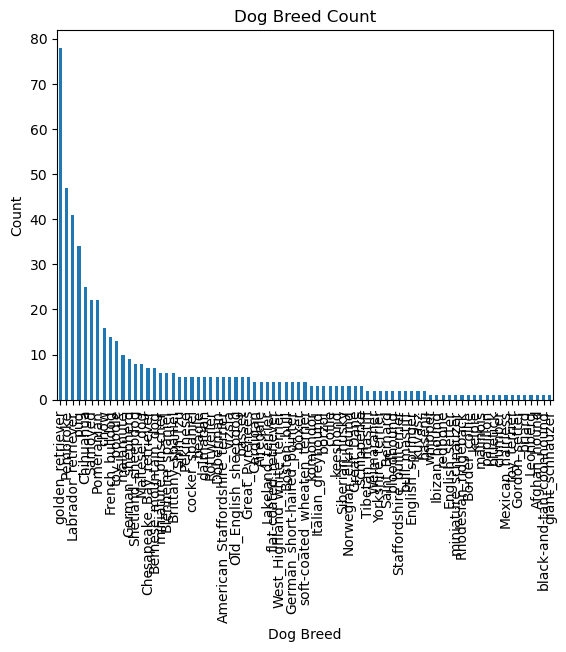

In [38]:
# count each value of p1 and visualize it as a histogram in matplotlib.
df_twit_archive_master.p1.value_counts().plot(kind='bar')
plt.title('Dog Breed Count')
plt.xlabel('Dog Breed')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

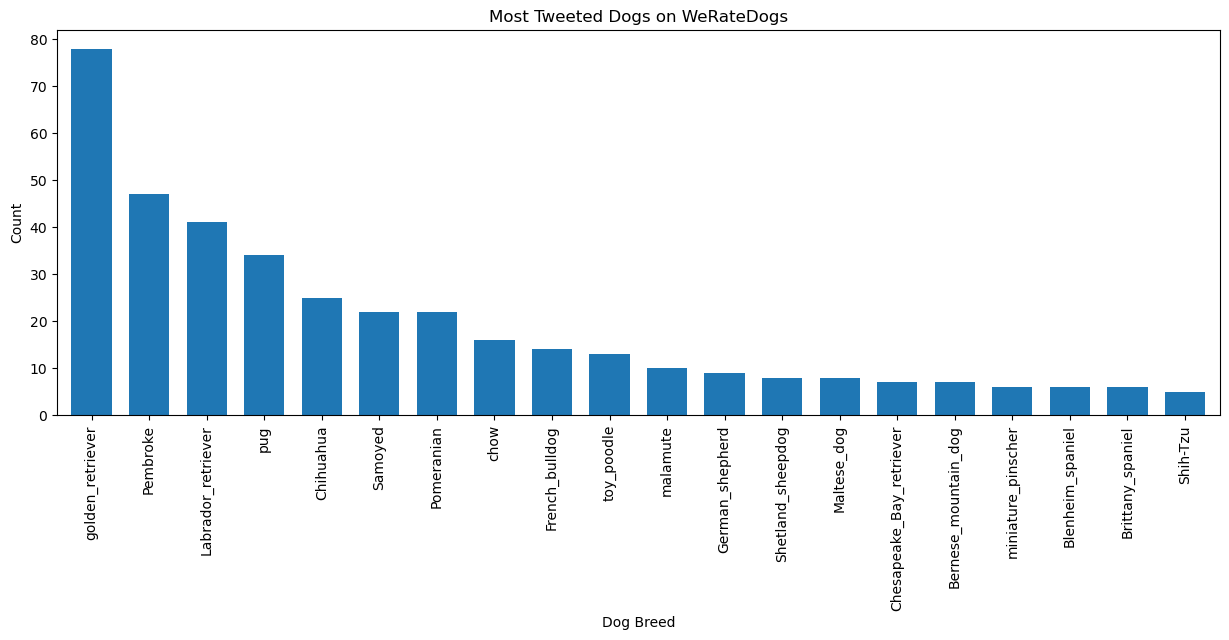

In [39]:
# The histogram above has too many values on the x-axis to be discernible, so we will only visualize the top 20. Also, set figsize to (15, 5).
df_twit_archive_master.p1.value_counts()[:20].plot(kind='bar', figsize=(15, 5), width=0.7)
plt.title('Most Tweeted Dogs on WeRateDogs')
plt.xlabel('Dog Breed')
plt.ylabel('Count')

Golden Retrievers are the most tweeted about dog, followed by Pembroke Welsh Corgis, Labrador Retrievers, and Pugs.

### Q2. On average, which dogs receive the most Likes and Retweets? Is there a correlation between Likes and Retweets?

Before you wonder how they might be related, let's visualize them together. Again, for reliability, we'll use only those with p1_conf > 0.75 and p1_dog = True.

Text(0, 0.5, 'Mean Retweet Count')

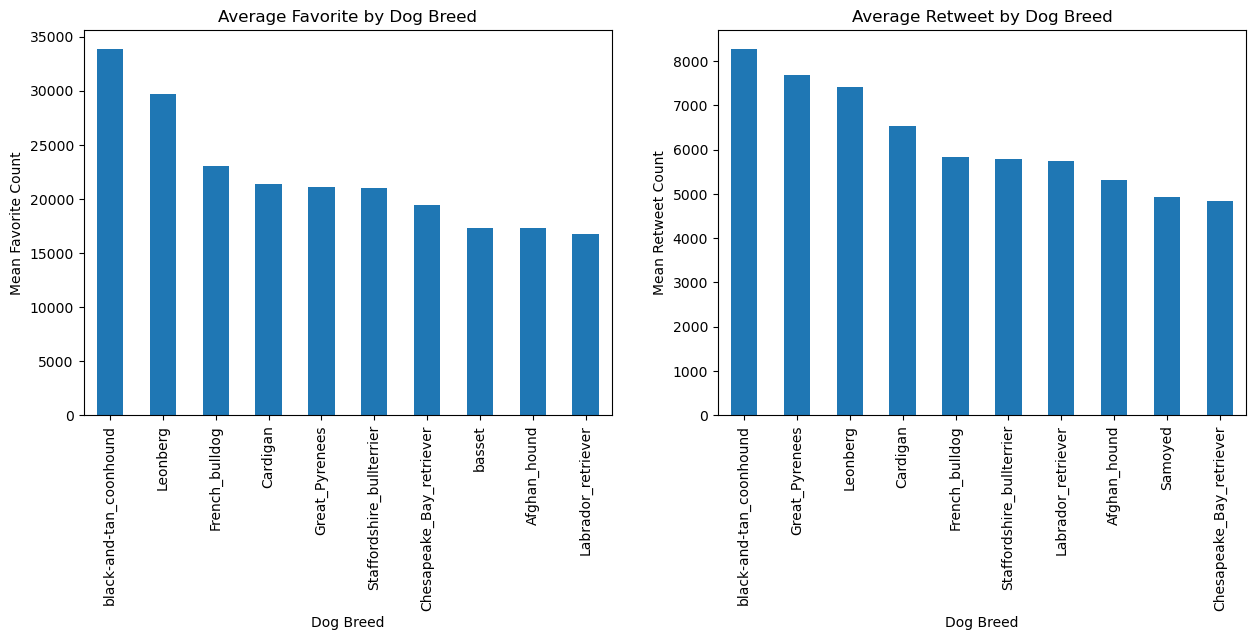

In [40]:
# We only extracted values with p1_conf > 0.75 and p1_dog = True from df_twit_archive_master earlier, so we won't repeat the process again.
# Create three graphs as subplots of (1, 2).
# Fix the x-axis of all of them to the value of p1.
# For the first graph, let the y-axis be the average of the values grouped by the value of p1 in the favorite_count column (top 10 only), and title it "Average Favorite by Dog Breed".
# The y-axis of the second graph is the average of the values grouped by p1 in the retweet_count column (top 10 only), and is titled 'Average Retweet value Dog Breed'.
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
df_twit_archive_master.groupby('p1').favorite_count.mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Average Favorite by Dog Breed')
plt.xlabel('Dog Breed')
plt.ylabel('Mean Favorite Count')
plt.subplot(1, 2, 2)
df_twit_archive_master.groupby('p1').retweet_count.mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Average Retweet by Dog Breed')
plt.xlabel('Dog Breed')
plt.ylabel('Mean Retweet Count')

On average, the dog with the highest score for Favorite and Retweet is 'black-and-tan_coonhound'. However, as you can see in Q1, the data is small except for the top few most-tweeted species, which makes averaging and comparing unreliable. Nevertheless, we can observe the same species in the top 10 except for 'basset' and 'Samoyed'. So, is there a correlation between Retweets and Favorites, except for species? If there is a correlation, then dogs with a lot of Retweets will have a lot of Favorites, but if there is no correlation, then dogs with a lot of Retweets will not have a lot of Favorites.

Text(0, 0.5, 'Retweet Count')

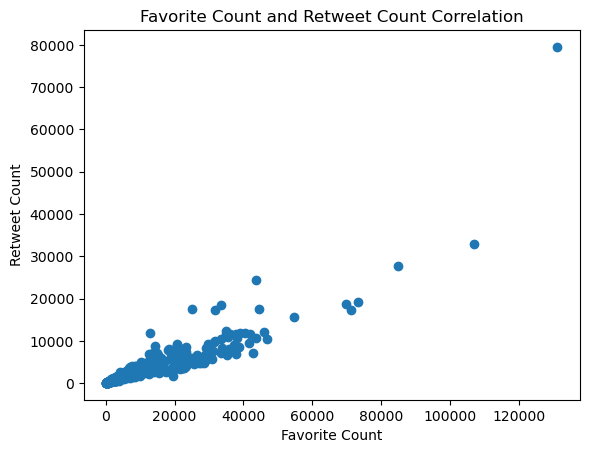

In [41]:
# Visualize the correlation between favorite_count and retweet_count.
plt.scatter(df_twit_archive_master.favorite_count, df_twit_archive_master.retweet_count)
plt.title('Favorite Count and Retweet Count Correlation')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')

In [42]:
# Since the correlation between favorite_count and retweet_count looks high in the graph above, calculate the correlation.
df_twit_archive_master.favorite_count.corr(df_twit_archive_master.retweet_count)

0.8940043564477693

We found a fairly high positive correlation.

### Q3. What is the average dog with a high rating? Is Rating also positively correlated with Favorite?

Proceed similarly.

Text(0, 0.5, 'Mean Rating')

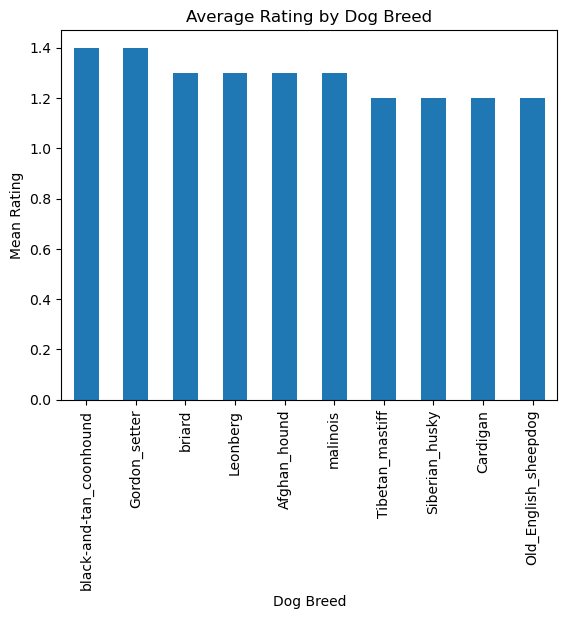

In [43]:
# Average the ratings, grouped by the value of p1, and visualize them.
df_twit_archive_master.groupby('p1').rating.mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Average Rating by Dog Breed')
plt.xlabel('Dog Breed')
plt.ylabel('Mean Rating')

In this case, black-and-tan_coonhound has the highest average rating. However, again, this may be skewed by the small number of data points. However, there may be a correlation between rating and favorite, except for species.

Text(0, 0.5, 'Favorite Count')

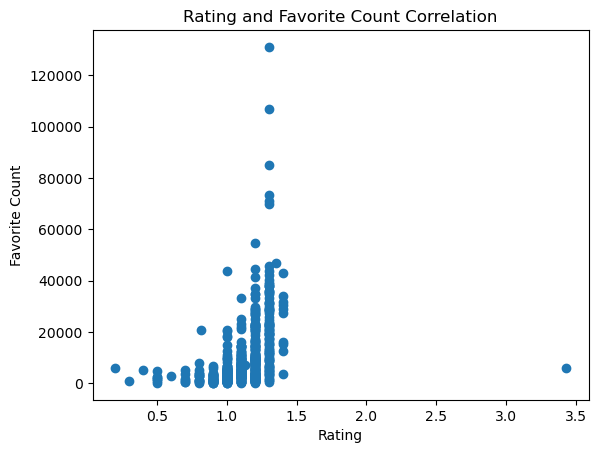

In [44]:
# Visualize the correlation between rating and favorite_count.
plt.scatter(df_twit_archive_master.rating, df_twit_archive_master.favorite_count)
plt.title('Rating and Favorite Count Correlation')
plt.xlabel('Rating')
plt.ylabel('Favorite Count')

In [45]:
# Check for a value of rating greater than or equal to 2.5.
df_twit_archive_master[df_twit_archive_master.rating >= 2.5]

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,p1,p1_conf,p1_dog,retweet_count,favorite_count
385,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",Sam,3.428571,NaN,golden_retriever,0.871342,True,1655,5927


Interestingly, with the exception of a few outliers, we can see that the rating asymptotes around 1.5 and takes the form of an exponential function. 